<a href="https://colab.research.google.com/github/zzerross/ai/blob/main/rnn/sin/RNNSin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from tensorflow import keras
from tensorflow.keras import datasets, layers, models, optimizers

mpl.rcParams['lines.markersize'] = 0.5

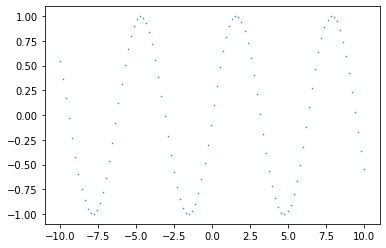

In [2]:
# pi/2 * 1 = 90
# pi/2 * 2 = 180
# pi/2 * 3 = 270
# pi/2 * 4 = 360
radians = np.linspace(-10, 10, 100)
data = np.sin(radians)
plt.scatter(radians, data)

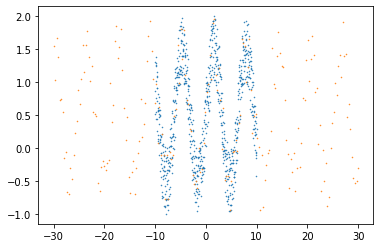

In [3]:
def get_input(start, end, num, timesteps):
  radians = np.linspace(start, end, num)
  sin = np.sin(radians) + np.random.random(num)
  return radians, sin

hidden_units = 50
timesteps = 20
input_dim = 1

start = -10
end = 10
train_x, train_y = get_input(start, end, 800, timesteps)
test_x, test_y = get_input(start * 3, end * 3, 200, timesteps)

plt.scatter(train_x, train_y)
plt.scatter(test_x, test_y)

In [4]:
def make_sequence(input, timesteps):
  return np.array(list(map(lambda x: input[x:x+timesteps], range(len(input) - timesteps))))

def test_sequence(n=3):
  a = [0, 1, 2, 3, 4, 5, 6]
  print(make_sequence(a, n))
  print(a[n-1:-1])
# test_sequence()

train_seq_x = make_sequence(train_x, timesteps)
train_seq_y = train_y[timesteps-1:-1]
test_seq_x = make_sequence(test_x, timesteps)
test_seq_y = test_y[timesteps-1:-1]

In [13]:
model = models.Sequential()
model.add(layers.SimpleRNN(hidden_units, input_shape=(timesteps, input_dim)))
model.add(layers.Dense(1))
model.compile(loss='mse')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 50)                2600      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [14]:
epochs = 100
history = model.fit(train_seq_x, train_seq_y, epochs=epochs, verbose=0)
test_loss = model.evaluate(test_seq_x, test_seq_y)

6/6 [==============================] - 0s 4ms/step - loss: 0.7764


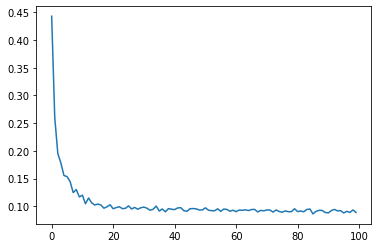

In [15]:
plt.plot(history.history['loss'])
plt.show()

In [16]:
test_loss = model.evaluate(test_seq_x, test_seq_y)

6/6 [==============================] - 0s 3ms/step - loss: 0.7764


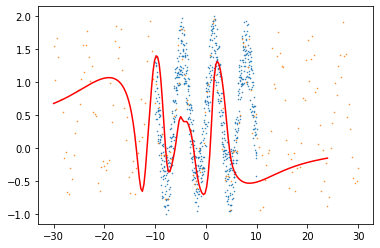

In [17]:
plt.scatter(train_x, train_y)
plt.scatter(test_x, test_y)

predicted_y = model.predict(test_seq_x)
plt.plot(test_x[:len(predicted_y)], predicted_y, 'r')